# The error in polynomial interpolation 
Theorem 8.4.1 in Greenbaum and Chartier states the following.

**Theorem** 

*Assume* $f$ is $n+1$ times continuously differentiable in a region $[a,b]$, and that $x_0, \ldots, x_n$ are distinct points in $[a,b]$. 

*Let* $p(x)$ be the unique polynomial of degree $n$ that interpolates $f$ and $x_0, \ldots, x_n$. 

*Then* $$f(x) - p(x) = \frac{1}{(n+1)!} f^{(n+1)}(\xi_x) \prod_{j=0}^n (x-x_i)$$
for some point $\xi_x$ in $[a,b]$ that depends on $x$.



This theorem gives us three terms that are fighting with each other:
$$|f(x) - p(x)| \le \frac{1}{(n+1)!} \cdot (\text{worst derivative}) \cdot (\text{polynomial on points})
The first term $1/(n+1)!$ is going down with $n$, so we want $n$ to be large. The second term $f^{(n+1)}$ says we want the derivatives to be controlled, so this will be bad if we have large derivatives. The final term depends on the points $x_i$ that are used to interpolate. We want the largest value of $\prod_{j=0}^n (x-x_i)$ to be small.

## Which part of the Runge function makes the approximation bad?

Recall that the Runge function is 
$$ f(x) = \frac{1}{1+x^2} $$
and this results in an extremely bad functional approximation when we use uniformly spaced points. So we want to understand what is causing that.

In [2]:
using Plots
using ApproxFun
using Interact

Interact.Slider{Int64}(Signal{Int64}(14, nactions=0),"N",14,3:25,true)

[Plots.jl] Initializing backend: pyplot


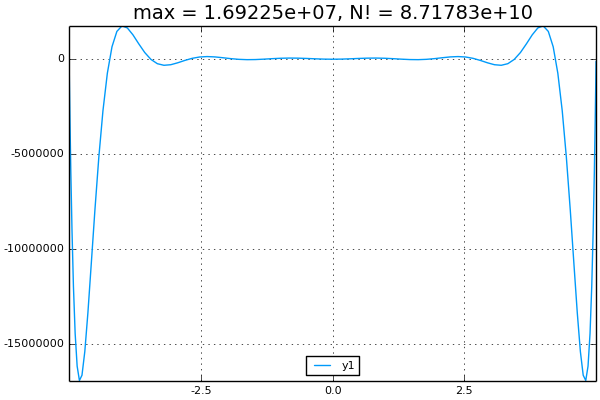

In [3]:
# Is it the polynomial that results from uniformly spaced points?
@manipulate for N=3:25
    xx1 = linspace(-5,5,N)
    x = Fun(x -> x, [-5.,5.])
    f = 0.0*x + 1.0
    for i=1:N
        f = f.*(x-xx1[i])
    end
    plot(f)
    title!(@sprintf("max = %g, N! = %g",
        maximum(abs(f)), factorial(N)))
end

Interact.Slider{Int64}(Signal{Int64}(14, nactions=0),"N",14,3:25,true)

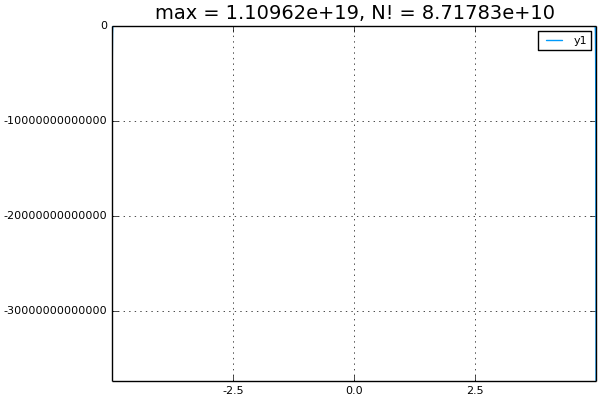

In [12]:
# Or the derivative?
@manipulate for N=3:25
    xx1 = linspace(-5,5,N)
    x = Fun(x -> x, [-5.,5.])
    f = 1./(1+x.^2);
    d = differentiate(f,N)
    title!(@sprintf("max = %g, N! = %g",
        maximum(d), factorial(N)))
end